In [1]:
import konlpy
from konlpy.tag import Okt 
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

In [2]:
# 데이터 처리 
import pandas as pd 
import numpy as np
# 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
# 시각화 옵션 
from IPython.display import set_matplotlib_formats

mpl.rc('font',family='Malgun Gothic') # 시각화 한글 글꼴 설정
mpl.rc('axes',unicode_minus = True)   # 음수값 글꼴 설정 

set_matplotlib_formats('retina') # 글씨체 선명하게 

In [3]:
kkma    = Kkma()
okt     = Okt()
komoran = Komoran()
hannanum= Hannanum()

In [4]:
df1 = pd.read_csv('./BERT_BMC/data/고객관계.csv')
print(df1.shape)
df1.head()

(504, 2)


,고객관계,label
0,공공에서 발주하는 경쟁 프로젝트 당선\n디자인을 통한 문제해결의 솔루션 제공,C
1,지속적인 신기술 소개 및 신제품 제안\n기존 판매 약품에 대한 기술 지원,C
2,실적을 바탕으로 공공입찰\n신탁회사와 지속적인 정보 공유로 공동주택(재개발/재건축)...,C
3,기업의 전문성과 우수성을 객관적으로 평가를 하는 기관평가(한국산업안전보건공단평가)...,A
4,당사 영업부와 디자인연구소가 제품관련 품질 및 디자인 등 니즈를 파악\n목표 고객에...,B


In [5]:
comm_list = df1['고객관계'].values.tolist()

In [6]:
comm_list[0]

'공공에서 발주하는 경쟁 프로젝트 당선\n디자인을 통한 문제해결의 솔루션 제공'

In [7]:
okt.pos(comm_list[0])

[('공공', 'Noun'),
 ('에서', 'Josa'),
 ('발주', 'Noun'),
 ('하는', 'Verb'),
 ('경쟁', 'Noun'),
 ('프로젝트', 'Noun'),
 ('당선', 'Noun'),
 ('\n', 'Foreign'),
 ('디자인', 'Noun'),
 ('을', 'Josa'),
 ('통한', 'Noun'),
 ('문제해결', 'Noun'),
 ('의', 'Josa'),
 ('솔루션', 'Noun'),
 ('제공', 'Noun')]

In [8]:
pos_data = pd.DataFrame(okt.pos(comm_list[0]) , columns=['형태소','품사'])
pos_data.head()

,형태소,품사
0,공공,Noun
1,에서,Josa
2,발주,Noun
3,하는,Verb
4,경쟁,Noun


In [9]:
df_Pos = pd.DataFrame()

for i in range(0,len(df1['고객관계'])):
    pos_data = okt.pos(df1['고객관계'].values.tolist()[i])
    dfn = pd.DataFrame(pos_data)
    
    df_Pos = pd.concat([df_Pos, dfn])

In [10]:
pos_data = df_Pos.rename(columns={0:'형태소',1:'품사'})
pos_data.head()

,형태소,품사
0,공공,Noun
1,에서,Josa
2,발주,Noun
3,하는,Verb
4,경쟁,Noun


In [11]:
pos_data.shape

(19622, 2)

In [12]:
pos_data['품사'].value_counts()
#josa / Punctuation / Adverb / Adverb

Noun           12079
Josa            3085
Punctuation     1066
Foreign          838
Verb             738
Suffix           505
Adjective        458
Modifier         444
Alpha            258
Adverb            70
Number            64
Determiner        13
Conjunction        2
Exclamation        2
Name: 품사, dtype: int64

In [13]:
cond1   = (pos_data['품사']=='Noun')
df_Noun = pos_data.loc[cond1]
df_Noun.head()

,형태소,품사
0,공공,Noun
2,발주,Noun
4,경쟁,Noun
5,프로젝트,Noun
6,당선,Noun


In [14]:
#Josa / Punctuation / Adverb / Number
cond1   = (pos_data['품사'] == 'Josa')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("df2.csv", mode='w', encoding='utf-8-sig')

cond1   = (pos_data['품사'] == 'Punctuation')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("df3.csv", mode='w', encoding='utf-8-sig')

cond1   = (pos_data['품사'] == 'Adverb')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("df4.csv", mode='w', encoding='utf-8-sig')

cond1   = (pos_data['품사'] == 'Number')
df2 = pos_data.loc[cond1]
df2.head()
df2.to_csv("df5.csv", mode='w', encoding='utf-8-sig')

In [15]:
from wordcloud import WordCloud

In [16]:
wc = WordCloud(width=800,height=600,
               font_path='HanaUL.ttf').generate(' '.join(df_Noun['형태소']))

# Noun

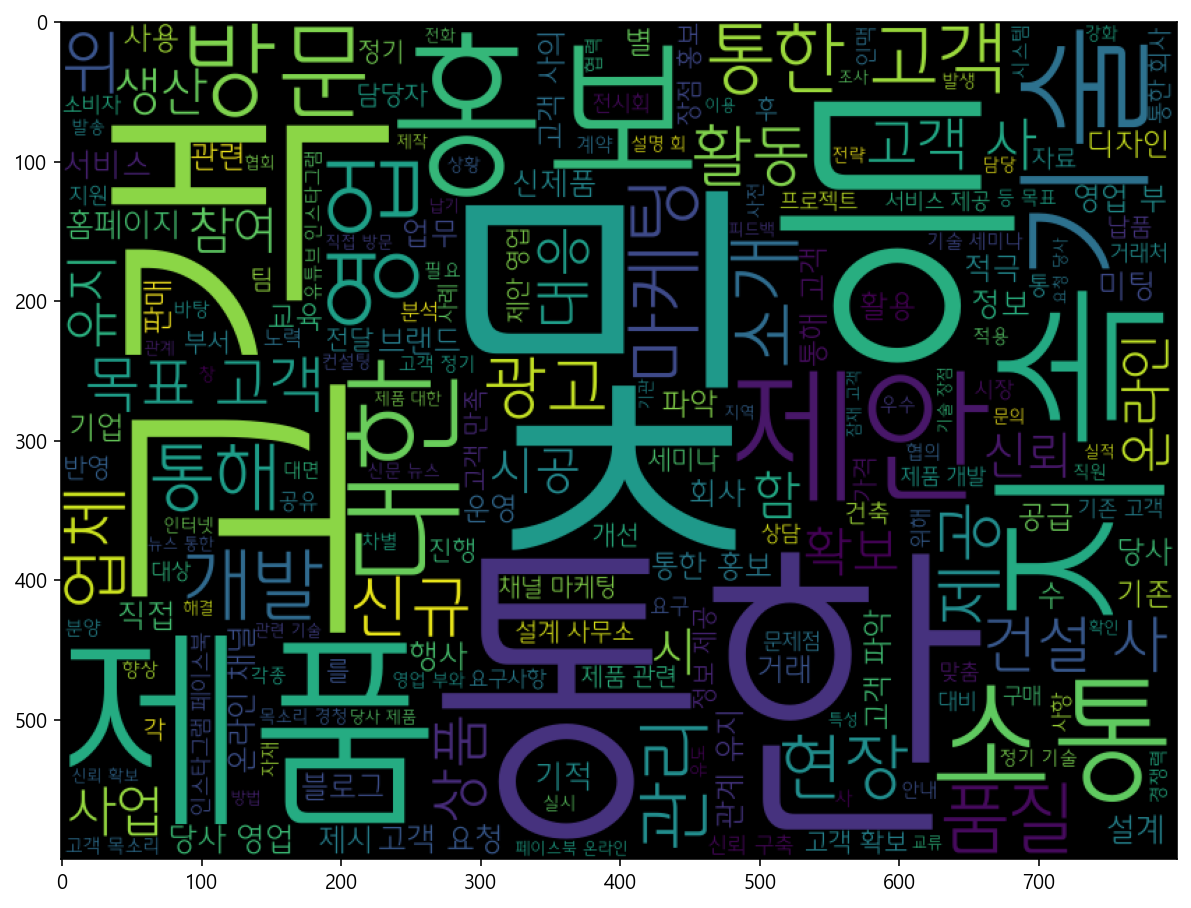

In [17]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

# Verb

In [18]:
cond2   = (pos_data['품사']=='Verb')
df_verb = pos_data.loc[cond2]
df_verb.head()

,형태소,품사
3,하는,Verb
12,하는,Verb
49,센,Verb
12,타사,Verb
6,타록,Verb


In [19]:
wc = WordCloud(width=800,height=600,
               font_path='HanaUL.ttf').generate(' '.join(df_verb['형태소']))

- 명사만 하면 될듯

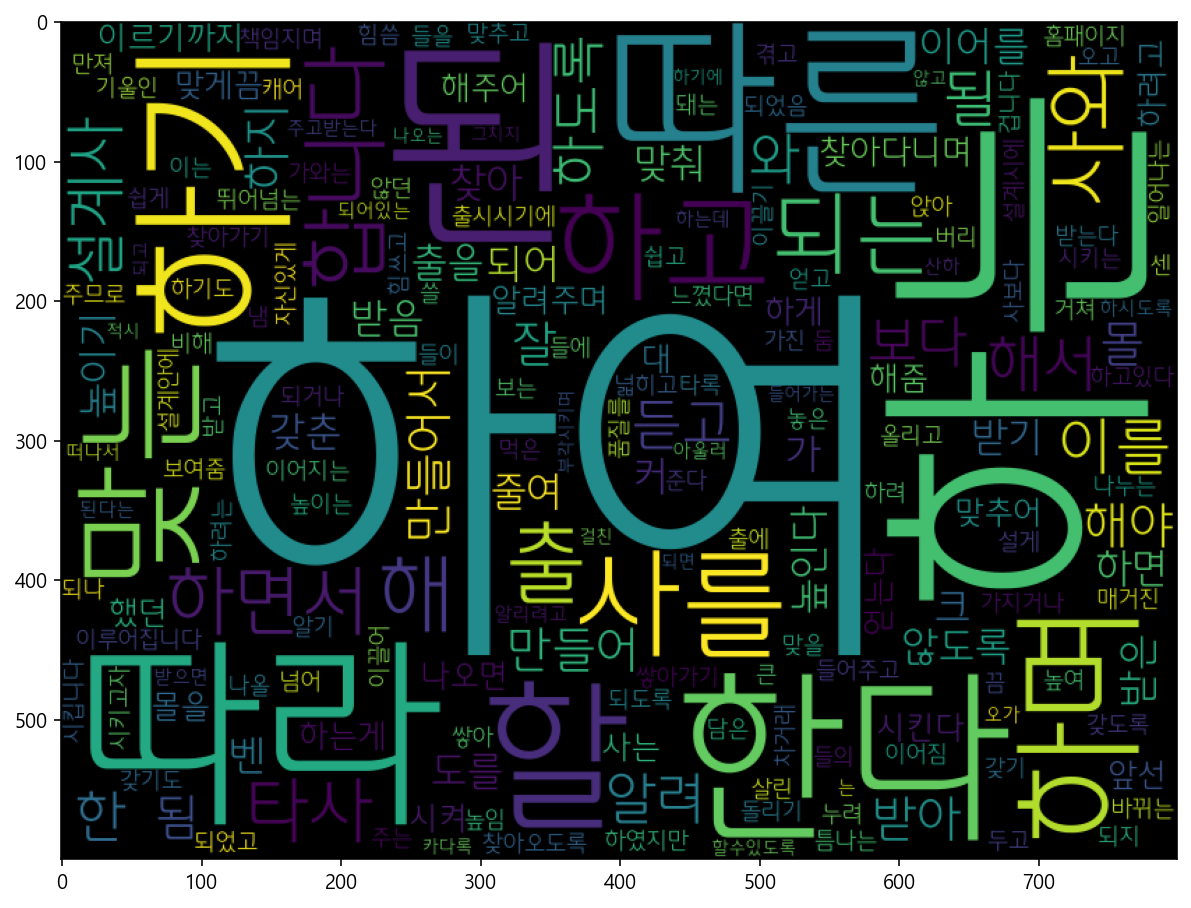

In [20]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

# 네트워크 분석

In [21]:
import networkx as nx 
from  apyori import apriori

from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터 처리 
import pandas as pd 
import numpy as np
# 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
# 시각화 옵션
from IPython.display import set_matplotlib_formats
# 한글 글꼴 설정
mpl.rc('font',family ='Malgun Gothic')
# 음수값 설정 
mpl.rc('axes',unicode_minus= True )
# 그래프 선명하게 출력
set_matplotlib_formats('retina')

In [22]:
from konlpy.tag import Okt
import re 

In [23]:
df_stopword  = pd.read_csv('stopword2.txt',header=None, names=['불용어'])
stopword_set = set(df_stopword['불용어'].values.tolist())

In [24]:
# 불용어 및 특수 기호 처리함수 구성 
def stopword_function(X): # Series 형태로 Input 
    clean_train_review = []
    okt = Okt()
    # 모든 X 값에 대해 불용어 및 특수기호 처리 
    for i in X:

        # 문자데이터에 대한 불용어 처리 
        if type(i) == str:
            # 특수 문자 처리 
            review_text = re.sub("[!1(+.),.@@\/n2345']?","",i) 
            # Tokenizing & Stemming 
            word_text = okt.morphs(review_text,stem=True)
            # StopWord 
            word_text = [token for token in word_text if not token in stopword_set]  

            clean_train_review.append(word_text)

        # 숫자데이터가 오는 경우, 공백을 append     
        else:
            clean_train_review.append([])
            
    return clean_train_review

In [25]:
Text_data = stopword_function(df1['고객관계'])

In [26]:
model_TFIDF = TfidfVectorizer()
model_TFIDF.fit_transform(df1['고객관계'])

<504x4265 sparse matrix of type '<class 'numpy.float64'>'
	with 9922 stored elements in Compressed Sparse Row format>

In [27]:
# 유사도 계산하기 위한 벡터 
idf_value = model_TFIDF.idf_

In [28]:
pd.DataFrame({'단어':model_TFIDF.get_feature_names(), '단어벡터':idf_value})

,단어,단어벡터
0,100,6.125946
1,11만호,6.531411
2,15년,6.125946
3,170개,6.531411
4,1군,6.531411
...,...,...
4260,희망,6.531411
4261,희망자에게,6.531411
4262,힘든,6.531411
4263,힘쓰고,6.531411


In [29]:
result = list(apriori(Text_data, min_support =0.02))

In [30]:
df_support = pd.DataFrame(result)

In [31]:
# items 내 단어 수 
df_support['word_count'] = df_support['items'].apply(lambda x : len(x))

In [32]:
cond1     = (df_support['word_count']==2)
df_result = df_support.loc[cond1]

In [33]:
df_result

,items,support,ordered_statistics,word_count
197,"(PR, \n)",0.033730,"[((), (PR, \n), 0.03373015873015873, 1.0), ((\...",2
198,"(SNS, \n)",0.059524,"[((), (SNS, \n), 0.05952380952380952, 1.0), ((...",2
199,"(\n, 가격)",0.033730,"[((), (\n, 가격), 0.03373015873015873, 1.0), ((\...",2
200,"(강화, \n)",0.029762,"[((), (강화, \n), 0.02976190476190476, 1.0), ((\...",2
201,"(\n, 개발)",0.101190,"[((), (\n, 개발), 0.10119047619047619, 1.0), ((\...",2
...,...,...,...,...
1023,"(홈페이지, 홍보)",0.023810,"[((), (홈페이지, 홍보), 0.023809523809523808, 1.0), ...",2
1024,"(확보, 홍보)",0.033730,"[((), (확보, 홍보), 0.03373015873015873, 1.0), ((홍...",2
1025,"(활동, 홍보)",0.033730,"[((), (활동, 홍보), 0.03373015873015873, 1.0), ((홍...",2
1026,"(활용, 홍보)",0.023810,"[((), (활용, 홍보), 0.023809523809523808, 1.0), ((...",2


In [34]:
graph_model = nx.Graph()
p_rank      = nx.pagerank(graph_model)
graph_model.add_edges_from(df_result['items'])

In [35]:
p_graph_shape = nx.kamada_kawai_layout(graph_model)

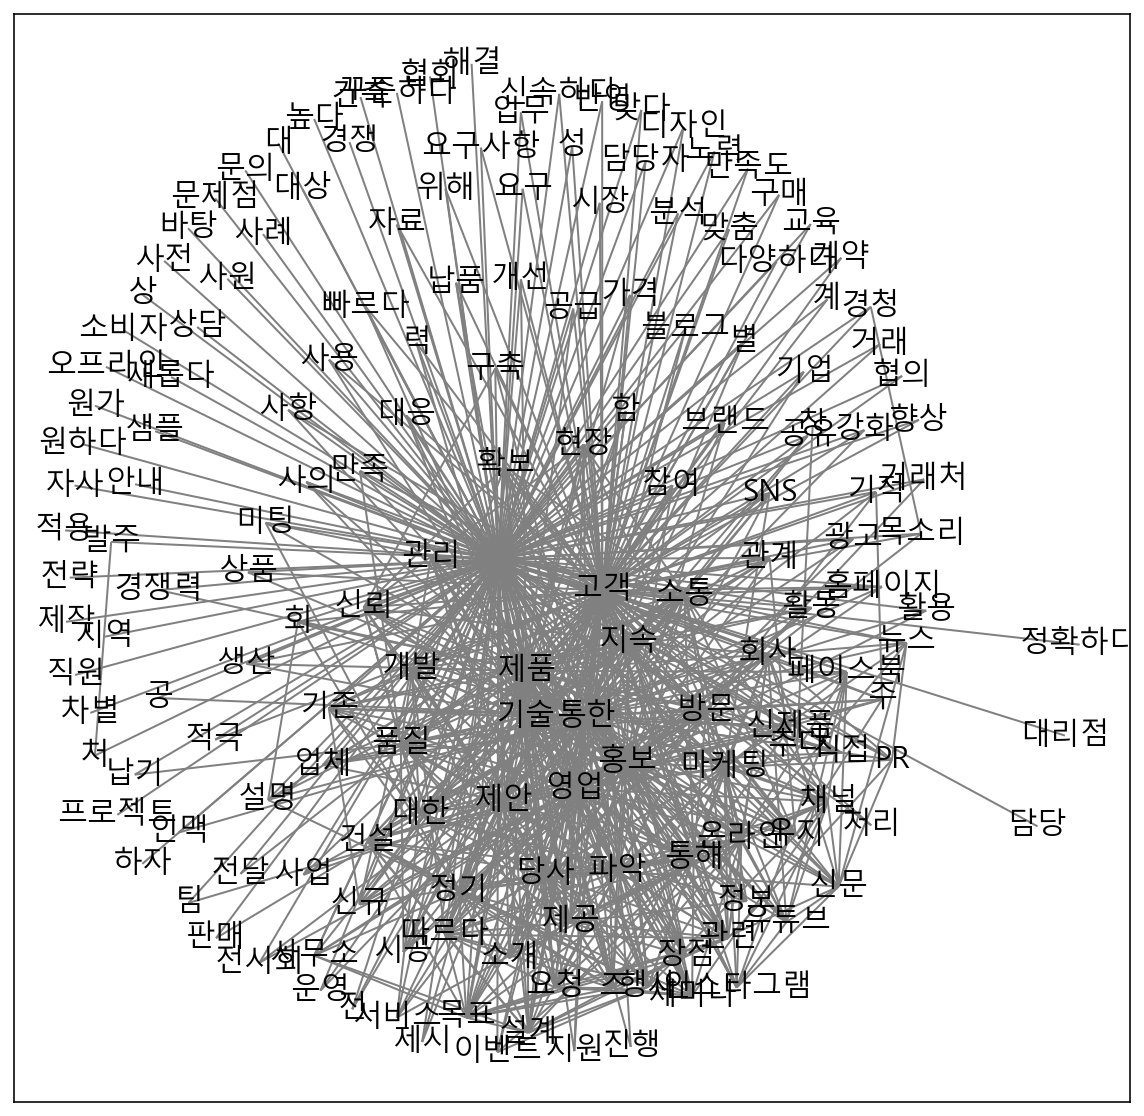

In [36]:
plt.figure(figsize=[10,10])
nx.draw_networkx(graph_model, font_family='Malgun Gothic', font_size= 15,
                pos=p_graph_shape , edge_color='0.5', node_color= list(p_rank.values()))

In [37]:
p_graph_shape = nx.shell_layout(graph_model)

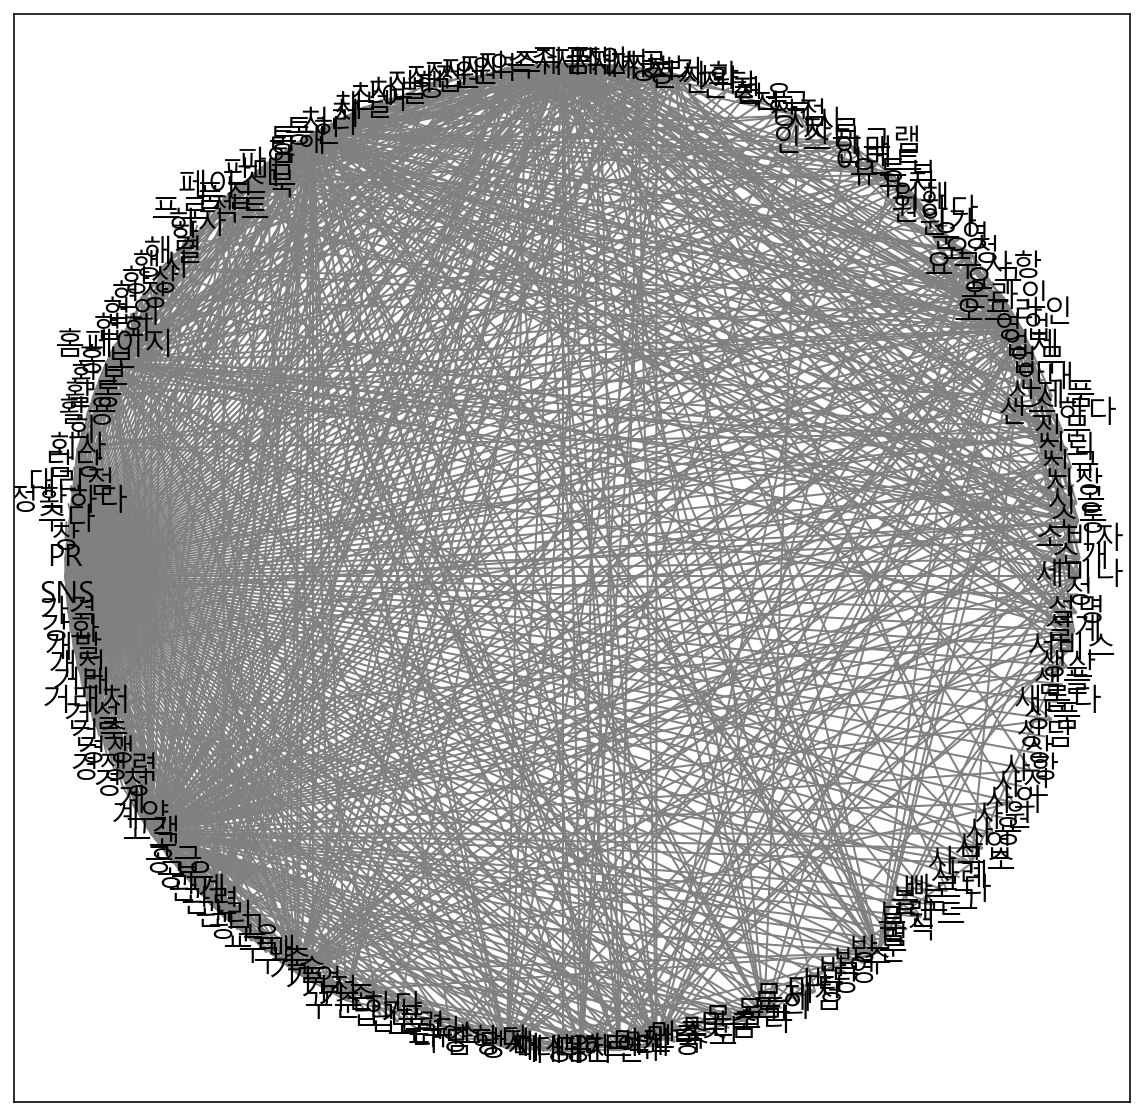

In [38]:
plt.figure(figsize=[10,10])
nx.draw_networkx(graph_model, font_family='Malgun Gothic', font_size= 15,
                pos=p_graph_shape , edge_color='0.5', node_color= list(p_rank.values()))